### Student Information
Name: 陳詩凱

Student ID: 110034103

GitHub ID: https://github.com/SkyChen1009

Kaggle name: Sky Sky Sky

Kaggle private scoreboard snapshot:

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---

# Load the data
### Since it is a json file, we extract the id and emotions from the dataset.

In [2]:
import json
import pandas as pd

# Step 1: Read the JSON file line by line and parse valid records
records = []
with open(r'C:\Users\skych\DM2024-Lab2-Homework\Data\tweets_DM.json', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        if not line:  # Skip empty lines
            continue
        try:
            # Parse each line as JSON
            data = json.loads(line)
            tweet = data.get('_source', {}).get('tweet', {})
            tweet_id = tweet.get('tweet_id')
            text = tweet.get('text')
            
            # Remove or replace newline characters in text
            if text:
                text = text.replace('\n', ' ').replace('\r', ' ')
            
            # Append only valid records with both id and text
            if tweet_id and text:
                records.append({'id': tweet_id, 'text': text})
        except json.JSONDecodeError:
            # Skip lines that fail to parse
            continue

# Step 2: Create a DataFrame from the valid records
df = pd.DataFrame(records)

# Step 3: Save to a CSV file with proper quoting
df.to_csv('tweets_cleaned.csv', index=False, quoting=1)  # quoting=1 ensures all text fields are quoted

# Step 4: Display the number of records
print(f"Processed {len(records)} valid tweets.")
df

Processed 1867535 valid tweets.


,id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Map the cleaned data into train and test dataset.
Now we have 2 dataset train.csv and test.csv which is based on data_identification.csv

In [3]:
import pandas as pd

# Step 1: Load the datasets
tweets_df = pd.read_csv('Data/tweets_cleaned.csv')  # Contains columns: id, text
identification_df = pd.read_csv('Data/data_identification.csv')  # Contains columns: tweet_id, identification
emotion_df = pd.read_csv('Data/emotion.csv')  # Contains columns: tweet_id, emotion

# Step 2: Merge the datasets on tweet_id/id
merged_df = tweets_df.merge(identification_df, left_on='id', right_on='tweet_id')
merged_df = merged_df.merge(emotion_df, left_on='id', right_on='tweet_id', how='left')  # Add emotion column

# Step 3: Split the data into train and test based on the 'identification' column
train_df = merged_df[merged_df['identification'] == 'train']
test_df = merged_df[merged_df['identification'] == 'test']

train_df = train_df.drop(columns=['tweet_id_x', 'tweet_id_y'])
test_df = test_df.drop(columns=['identification', 'tweet_id_x', 'tweet_id_y'])

# Step 4: Save the split datasets
train_df[['id', 'text', 'emotion']].to_csv('train.csv', index=False, header=True)  # Save with headers
test_df[['id', 'text', 'emotion']].to_csv('test.csv', index=False, header=True)    # Save with headers

# Step 5: Print information
print(f"Train data: {len(train_df)} entries saved to 'train.csv'")
print(f"Test data: {len(test_df)} entries saved to 'test.csv'")
test_df


Train data: 1455563 entries saved to 'train.csv'
Test data: 411972 entries saved to 'test.csv'


,id,text,emotion
2,0x28b412,"Confident of your obedience, I write to you, k...",NaN
4,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN
9,0x218443,When do you have enough ? When are you satisfi...,NaN
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",NaN
33,0x26289a,"In these tough times, who do YOU turn to as yo...",NaN
...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",NaN
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",NaN
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,NaN
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,NaN


### Now we have mapped the emotions in emotions.csv into train.csv which have id, text, emotions column.
However, there are no emotions in test data which is the object we need to accomplish in the lab.|

In [4]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (1455563, 4)
Shape of Testing df:  (411972, 3)


---

## EDA

In [5]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

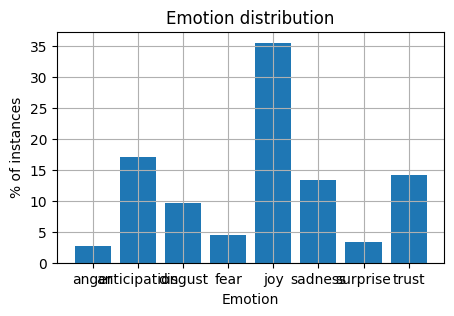

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

---

# Feature Engineering

### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

In [ ]:
type(train_data_BOW_features)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

In [ ]:
"😂" in feature_names

In [ ]:
import nltk
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

In [ ]:
train_data_BOW_features_500.toarray()

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

In [ ]:
"😂" in feature_names_500

In [ ]:
# apply analyzer to training data
BOW_500.fit(test_df['text'])

test_data_BOW_features_500 = BOW_500.transform(test_df['text'])

In [ ]:
test_data_BOW_features_500.toarray()

---

# Modeling
### Keras

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_df['emotion'])
# y_test_encoded = label_encoder.transform(y_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, ReLU, Softmax

# Convert sparse matrices to dense
X_train = train_data_BOW_features_500.toarray()
X_test = test_data_BOW_features_500.toarray()

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train_encoded)

print("Input shape:", X_train.shape)
print("Output shape:", y_train.shape)

# Build the neural network model
model = Sequential([
    Dense(units=64, input_shape=(X_train.shape[1],)),
    ReLU(),
    Dense(units=64),
    ReLU(),
    Dense(units=y_train.shape[1]),  # Number of classes
    Softmax()
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
epochs = 25
batch_size = 256
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size)

print("Training completed.")

# Predict emotions for the test dataset
y_pred_proba = model.predict(X_test)  # Predict probabilities for each class
y_pred = np.argmax(y_pred_proba, axis=1)  # Get class indices
y_pred_labels = label_encoder.inverse_transform(y_pred)  # Convert indices back to original labels

# Save the predictions to test_df
test_df['emotion'] = y_pred_labels

# Save the updated test_df to a CSV file
test_df[['id', 'emotion']].to_csv('test_with_predictions_1206.csv', index=False)
print("Predictions saved to 'test_with_predictions_1206.csv'.")

---
# Using DT as training model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'train_df' is your training DataFrame with 'text' and 'emotion' columns
X = train_df['text']
y = train_df['emotion']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Make predictions on validation set
y_pred = dt_model.predict(X_val_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {accuracy:.4f}")

# Prepare test data
X_test = test_df['text']
X_test_tfidf = vectorizer.transform(X_test)

# Make predictions on test set
test_predictions = dt_model.predict(X_test_tfidf)

# Create submission DataFrame
submission_df = pd.DataFrame({'id': test_df['id'], 'emotion': test_predictions})
submission_df.to_csv('decision_tree_submission_1203.csv', index=False)

## Conclusion

### The process of constructing decision tree is extremely waste of time (about 30 mins+ ). I assume this is because of imbalance dataset which make the training process very unscessful. The accuracy is only 0.18